<a href="https://colab.research.google.com/github/ShanChartrand/NECDataCleaning/blob/main/NEC_June_14_2023_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adding my libraries

In [332]:
!pip install geopandas
!pip install wheel
!pip install numpy
!pip install shapely
!pip install fiona
!pip install pyproj
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing file

In [333]:
import pandas as pd
df = pd.read_csv('https://github.com/InternetSocietyManitobaChapter/JupyterNotebook_NorthEndConnect/raw/main/nec%20June%2014%202023.csv')

Viewing original number of rows and columns

In [334]:
# Count the number of rows and columns
num_rows = df.shape[0]
num_columns = df.shape[1]

# Print the results
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 20710
Number of columns: 31


Removing rows 2-8064, before metrics such as Jitter, Latency, and Packet loss were reliably measured, and counting the new number of rows

In [335]:
# Read the CSV file
df = pd.read_csv('https://github.com/InternetSocietyManitobaChapter/JupyterNotebook_NorthEndConnect/raw/main/nec%20June%2014%202023.csv')

# Remove rows 2 through 8064
df.drop(df.index[1:8064], inplace=True)

# Save the updated DataFrame
df.to_csv('https://github.com/InternetSocietyManitobaChapter/JupyterNotebook_NorthEndConnect/raw/main/nec%20June%2014%202023.csv', index=False)

# Count the number of rows
num_rows = df.shape[0]

# Print the results
print("Number of rows:", num_rows)


Number of rows: 12647


Looking at the % of missing items in columns

In [336]:
# Calculate the percentage of missing cells in each column
missing_percentages = df.isna().sum() / len(df) * 100

# Print the result
print(missing_percentages)

TEST ID                       0.000000
TEST DATE / UTC HOUR          0.000000
GEO LATITUDE                  0.000000
GEO LONGITUDE                 0.000000
DOWNLOAD SPEED                0.000000
UPLOAD SPEED                  0.000000
JITTER                        0.007907
LATENCY                       0.007907
PACKET LOSS                   0.007907
MOBILE TEST                   0.000000
ISP                           0.000000
CLIENT IP                     0.000000
CLIENT CITY                   0.000000
CLIENT PROVINCE               0.000000
CLIENT POSTAL CODE            0.000000
AS NUMBER                     0.007907
IPV6 SUPPORTED                0.000000
DNSSEC SUPPORTED              0.000000
TEST SERVER                   0.000000
browser_test_url              0.007907
CONTRACTED DOWNLOAD SPEED    74.428718
CONTRACTED UPLOAD SPEED      79.101763
CONTRACTED DATA CAP          85.617142
CONTRACTED MONTHLY COST      79.362695
SERVICE TYPE                 73.052898
USER SATISFACTION        

Removing columns with greater than 68% missing values, and then listing the remaining number of rows & columns

In [337]:
# List of columns to remove
columns_to_remove = [
    'CONTRACTED DOWNLOAD SPEED',
    'CONTRACTED UPLOAD SPEED',
    'CONTRACTED DATA CAP',
    'CONTRACTED MONTHLY COST',
    'SERVICE TYPE',
    'USER SATISFACTION',
    'CONNECTION TYPE',
    'USER COMMENTS',
    'HEATMAP_PROJECT_AREA'
]

# Remove the columns
df.drop(columns=columns_to_remove, inplace=True)

# Save the updated DataFrame
df.to_csv('https://github.com/InternetSocietyManitobaChapter/JupyterNotebook_NorthEndConnect/raw/main/nec%20June%2014%202023.csv', index=False)

# Count the number of rows and columns
num_rows = df.shape[0]
num_columns = df.shape[1]

# Print the results
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 12647
Number of columns: 22


Checking for duplicates in the TEST ID column

In [338]:
# Count the number of duplicated TEST ID values
num_duplicates = df.duplicated(subset='TEST ID', keep=False).sum()

# Print the number of duplicates
print(f"There are {num_duplicates} rows with duplicated TEST ID values.")

There are 0 rows with duplicated TEST ID values.


Looking for duplicate rows

In [339]:
# Find duplicate rows based on all columns
duplicates = df[df.duplicated()]

# Display the duplicate rows (if any)
if len(duplicates) > 0:
    print(f"Found {len(duplicates)} duplicate rows:")
    print(duplicates)
else:
    print("No duplicate rows found.")

No duplicate rows found.


Now that we have removed the columns with 68+% of missing data, re-checking the % of remaining missing data

In [340]:
# Calculate the percentage of missing cells in each column
missing_percentages = df.isna().sum() / len(df) * 100

# Print the result
print(missing_percentages)

TEST ID                  0.000000
TEST DATE / UTC HOUR     0.000000
GEO LATITUDE             0.000000
GEO LONGITUDE            0.000000
DOWNLOAD SPEED           0.000000
UPLOAD SPEED             0.000000
JITTER                   0.007907
LATENCY                  0.007907
PACKET LOSS              0.007907
MOBILE TEST              0.000000
ISP                      0.000000
CLIENT IP                0.000000
CLIENT CITY              0.000000
CLIENT PROVINCE          0.000000
CLIENT POSTAL CODE       0.000000
AS NUMBER                0.007907
IPV6 SUPPORTED           0.000000
DNSSEC SUPPORTED         0.000000
TEST SERVER              0.000000
browser_test_url         0.007907
HEATMAP_MUNICIPALITY     0.000000
HEATMAP_CENSUS_TRACTS    0.000000
dtype: float64


As per above, we can see that the columns that have missing items each have exactly 0.007907%, which indicates there was a test interruption or failure with CIRA. Will remove those rows then confirm the % of missing items per column.

In [341]:
# List of columns to check for missing values
columns_to_check = ['JITTER', 'LATENCY', 'PACKET LOSS', 'AS NUMBER', 'browser_test_url']

# Remove rows with missing values in specified columns
df.dropna(subset=columns_to_check, inplace=True)

# Save the updated DataFrame
df.to_csv('https://github.com/InternetSocietyManitobaChapter/JupyterNotebook_NorthEndConnect/raw/main/nec%20June%2014%202023.csv', index=False)

# Calculate the percentage of missing cells in each column
missing_percentages = df.isna().sum() / len(df) * 100

# Print the result
print(missing_percentages)

TEST ID                  0.0
TEST DATE / UTC HOUR     0.0
GEO LATITUDE             0.0
GEO LONGITUDE            0.0
DOWNLOAD SPEED           0.0
UPLOAD SPEED             0.0
JITTER                   0.0
LATENCY                  0.0
PACKET LOSS              0.0
MOBILE TEST              0.0
ISP                      0.0
CLIENT IP                0.0
CLIENT CITY              0.0
CLIENT PROVINCE          0.0
CLIENT POSTAL CODE       0.0
AS NUMBER                0.0
IPV6 SUPPORTED           0.0
DNSSEC SUPPORTED         0.0
TEST SERVER              0.0
browser_test_url         0.0
HEATMAP_MUNICIPALITY     0.0
HEATMAP_CENSUS_TRACTS    0.0
dtype: float64


We had 12647 rows, let's see how many were removed

In [342]:
# Count the number of rows
num_rows = df.shape[0]

# Print the results
print("Number of rows:", num_rows)

Number of rows: 12645


We can see that only 2 rows were removed. Now to determine the # of unique ISPs

In [343]:
unique_isp_count = len(df['ISP'].unique())
print("Number of unique ISPs:", unique_isp_count)

Number of unique ISPs: 88


I'm going to list all the different ISPs

In [344]:
unique_isps = df['ISP'].unique()
for isp in unique_isps:
 print(isp)

Shaw Communications Inc.
Bell MTS
WiBand Communications
TekSavvy Solutions, Inc.
Bell Canada
Altima Telecom
Cipherkey Exchange Corp.
Red River College of Applied Arts
CIK Telecom INC
Voyageur Internet Inc
Xplornet Communications Inc.
MERLIN
The Exchange Global Server Center
Amanah Tech Inc.
Primus Telecommunications Canada Inc.
ViaNetTV Inc
Rogers Communications Canada Inc.
City of Winnipeg
Stafford Communications, Inc.
Full Throttle Networks Inc.
MTS Inc.
Total Server Solutions L.L.C.
Questzone.Net, Inc.
TELUS Communications Inc.
RBC Convention Centre Winnipeg
Cogent Communications
BIGPIPE
University of Manitoba
Corus Entertainment Inc
Postmedia Network Inc
Fastnet Communications
T. Grand Networks Inc.
Netminders Data Solution
Manitoba Hydro Telecom
TeraGo Networks Inc
Alberta Health Services
South Winnipeg Technical Centre
Swift High Speed.com
VPN
TeraGo Networks Inc.
Xplornet Communications Inc
GloboTech Communications
Corridor Communications, INC.
LES.NET
VOI NET INC.
Packet Exchan

Now we must standardize the ISPs and then count the # of unique ISPs after standardization

In [345]:
def standardize_isp(isp):
    replacements = {
        "Access Communications  Co-operative Limited": "Access Communications Co-operative Limited",
        "Amanah Tech": "Amanah Tech Inc.",
        "Amazon.com, Inc.": "Amazon Technologies Inc.",
        "Bell MTS": "Bell Canada",
        "Bell Mobility": "Bell Canada",
        "Bell Mobility, Inc.": "Bell Canada",
        "Bell MTS Data Centres G.P": "Bell Canada",
        "CIK Telecom": "CIK Telecom INC",
        "Commstream Communications": "Commstream Communications Inc",
        "Corridor Communications, INC.": "Corridor Communications",
        "Manitoba First Nations Education Resource Centre Inc.": "Manitoba First Nations Education Resource Centre",
        "Manitoba Hydro International LTD": "Manitoba Hydro",
        "Manitoba Hydro Telecom": "Manitoba Hydro",
        "MTS Allstream": "MTS Inc.",
        "MTS Inc": "MTS Inc.",
        "MTS Allstream Inc.": "MTS Inc.",
        "MTS Data Centres": "MTS Inc.",
        "Red River College of Applied Arts": "Red River College",
        "Red River College of Applied Arts, Science and Tec": "Red River College",
        "Rogers Cable": "Rogers Communications",
        "Rogers Communications Canada Inc.": "Rogers Communications",
        "Full Throttle Networks": "Full Throttle Networks Inc.",
        "Postmedia Network": "Postmedia Network Inc",
        "Radiant Communications Canada Ltd.": "Radiant Communications Canada",
        "Shaw Communications Inc.": "Shaw Communications",
        "Shaw Telecom G.P.": "Shaw Communications",
        "SpaceX Services": "SpaceX",
        "SpaceX Starlink": "SpaceX",
        "TekSavvy Solutions, Inc.": "TekSavvy Solutions",
        "TELUS Communications Inc": "Telus Communications",
        "TELUS Communications Inc.": "Telus Communications",
        "TeraGo Networks Inc": "TeraGo Networks",
        "TeraGo Networks Inc.": "TeraGo Networks",
        "Total Server Solutions L.L.C": "Total Server Solutions L.L.C",
        "Voyageur Internet Inc": "Voyageur Internet",
        "Xplornet Communications Inc": "Xplornet Communications",
        "Xplornet Communications Inc.": "Xplornet Communications"
    }

    return replacements.get(isp, isp)

# Example usage:
# Assuming you have a DataFrame named 'df' with a column named 'ISP'
df['ISP'] = df['ISP'].apply(standardize_isp)

# Save the updated DataFrame
df.to_csv('https://github.com/InternetSocietyManitobaChapter/JupyterNotebook_NorthEndConnect/raw/main/nec%20June%2014%202023.csv', index=False)

unique_isp_count = len(df['ISP'].unique())
print("Number of unique ISPs:", unique_isp_count)

Number of unique ISPs: 77


I'm going to re-list all the different ISPs

In [346]:
unique_isps = df['ISP'].unique()
for isp in unique_isps:
 print(isp)

Shaw Communications
Bell Canada
WiBand Communications
TekSavvy Solutions
Altima Telecom
Cipherkey Exchange Corp.
Red River College
CIK Telecom INC
Voyageur Internet
Xplornet Communications
MERLIN
The Exchange Global Server Center
Amanah Tech Inc.
Primus Telecommunications Canada Inc.
ViaNetTV Inc
Rogers Communications
City of Winnipeg
Stafford Communications, Inc.
Full Throttle Networks Inc.
MTS Inc.
Total Server Solutions L.L.C.
Questzone.Net, Inc.
Telus Communications
RBC Convention Centre Winnipeg
Cogent Communications
BIGPIPE
University of Manitoba
Corus Entertainment Inc
Postmedia Network Inc
Fastnet Communications
T. Grand Networks Inc.
Netminders Data Solution
Manitoba Hydro
TeraGo Networks
Alberta Health Services
South Winnipeg Technical Centre
Swift High Speed.com
VPN
GloboTech Communications
Corridor Communications
LES.NET
VOI NET INC.
Packet Exchange Limited
Performive LLC
Radiant Communications Canada
SpaceX
Access Communications Co-operative Limited
BH Telecom Corp.
MRNet


Looking at for upload/download speeds of 0 mbps

In [347]:
# Count the number of cells equal to zero in the 'DOWNLOAD SPEED' column
download_speed_zeros = (df['DOWNLOAD SPEED'] == 0).sum()

# Count the number of cells equal to zero in the 'UPLOAD SPEED' column
upload_speed_zeros = (df['UPLOAD SPEED'] == 0).sum()

# Print the counts
print("Number of cells equal to zero in 'DOWNLOAD SPEED' column:", download_speed_zeros)
print("Number of cells equal to zero in 'UPLOAD SPEED' column:", upload_speed_zeros)

Number of cells equal to zero in 'DOWNLOAD SPEED' column: 0
Number of cells equal to zero in 'UPLOAD SPEED' column: 6


I now need to remove the rows that have upload speeds of 0, and then list how many cells = 0 to confirm removal was successful

In [348]:
# Count the number of cells equal to zero in the 'UPLOAD SPEED' column before removal
upload_speed_zeros_before = (df['UPLOAD SPEED'] == 0).sum()

# Remove rows where UPLOAD SPEED is equal to 0
df = df[df['UPLOAD SPEED'] != 0]

# Count the number of cells equal to zero in the 'UPLOAD SPEED' column after removal
upload_speed_zeros_after = (df['UPLOAD SPEED'] == 0).sum()

# Save the updated DataFrame
df.to_csv('https://github.com/InternetSocietyManitobaChapter/JupyterNotebook_NorthEndConnect/raw/main/nec%20June%2014%202023.csv', index=False)

# Print the count before and after removal
print("Number of cells equal to zero in 'UPLOAD SPEED' column before removal:", upload_speed_zeros_before)
print("Number of cells equal to zero in 'UPLOAD SPEED' column after removal:", upload_speed_zeros_after)

Number of cells equal to zero in 'UPLOAD SPEED' column before removal: 6
Number of cells equal to zero in 'UPLOAD SPEED' column after removal: 0


Standarding the all the sub-categories of Winnipeg to be just "Winnipeg"

In [349]:
df['CLIENT CITY'] = df['CLIENT CITY'].str.replace('.*Winnipeg.*', 'Winnipeg', regex=True)

# Get the unique client cities
unique_cities = df['CLIENT CITY'].unique()

# Save the updated DataFrame
df.to_csv('https://github.com/InternetSocietyManitobaChapter/JupyterNotebook_NorthEndConnect/raw/main/nec%20June%2014%202023.csv', index=False)

# Print the unique client cities
for city in unique_cities:
    print(city)

Winnipeg
Toronto
Vancouver
La Salle
Oakbank
Marathon
Cambridge
Edmonton
Georgetown
Port Hope
Thorold
Old Toronto
Blackstock
Selkirk
Lindsay
Charlemagne
Steinbach
London
Etobicoke
Brandon
Marchand
Baie-d'Urfe
Saint-Quentin
Stonewall
Barrie
Markdale
Hartland
Kenora
Montreal
Calgary
Dowling
Bradford
Dryden
Regina
Thunder Bay
Sydney
North York
Brampton
Mississauga
Heritage Pointe
Cobourg
Hamilton
Cooks Creek
Moose Jaw
Teulon
Headingley
Hague
Markham
Chestermere
Peterborough
Ottawa


We want to remove any rows where LATENCY >= 30,000 and then list how many rows were removed

In [350]:
# Count the number of rows before removing
count_before = len(df)

# Remove rows where latency >= 30,000
df = df[df['LATENCY'] < 30000]

# Count the number of rows after removing
count_after = len(df)

# Calculate the count of removed rows
count_removed = count_before - count_after

# Print the count of removed rows
print("Number of removed rows:", count_removed)

Number of removed rows: 1


Deciding if mean or median should be used as the measure of central tendency for UPLOAD SPEED. Looking at the variability/skewness of the Winnipeg data

In [351]:
# Filter the DataFrame to include only rows where CLIENT CITY is Winnipeg
filtered_df = df[df['CLIENT CITY'] == 'Winnipeg']

# Extract the UPLOAD SPEED column as a Series
upload_speed = df['UPLOAD SPEED']

# Calculate the mean and median
mean = upload_speed.mean()
median = upload_speed.median()

# Calculate other statistical measures
range_val = upload_speed.max() - upload_speed.min()
std_dev = upload_speed.std()
skewness = upload_speed.skew()


# Find the minimum and maximum values
min_upload_speed = upload_speed.min()
max_upload_speed = upload_speed.max()

# Print the results
print("Min UPLOAD SPEED:", min_upload_speed)
print("Max UPLOAD SPEED:", max_upload_speed)
print("Mean UPLOAD SPEED:", mean)
print("Median UPLOAD SPEED:", median)
print("Range UPLOAD SPEED:", range_val)
print("Standard Deviation UPLOAD SPEED:", std_dev)
print("Skewness UPLOAD SPEED:", skewness)

Min UPLOAD SPEED: 0.01
Max UPLOAD SPEED: 932.9
Mean UPLOAD SPEED: 24.325571292926096
Median UPLOAD SPEED: 7.59
Range UPLOAD SPEED: 932.89
Standard Deviation UPLOAD SPEED: 59.229455633774
Skewness UPLOAD SPEED: 6.624670605505908


The data suggests that there is a wide range of upload speeds, with some observations having very low speeds and others having very high speeds. The average upload speed is relatively low compared to the median, indicating the presence of outliers or highly skewed values towards the higher end. The high standard deviation and positive skewness further confirm the variability and right-skewness in the distribution of upload speeds. Given the skewness and potential presence of outliers in the data, **the median would be a more robust measure of central tendency** for capturing the typical upload speed.

Descriptive stats for DOWNLOAD SPEED for Winnipeg


In [352]:
# Filter the DataFrame to include only rows where CLIENT CITY is Winnipeg
filtered_df = df[df['CLIENT CITY'] == 'Winnipeg']

# Extract the DOWNLOAD SPEED column as a Series
download_speed = df['DOWNLOAD SPEED']

# Calculate the mean and median
mean = download_speed.mean()
median = download_speed.median()

# Calculate other statistical measures
range_val = download_speed.max() - download_speed.min()
std_dev = download_speed.std()
skewness = download_speed.skew()

# Find the minimum and maximum values
min_download_speed = download_speed.min()
max_download_speed = download_speed.max()

# Print the results
print("Min DOWNLOAD SPEED:", min_download_speed)
print("Max DOWNLOAD SPEED:", max_download_speed)
print("Mean DOWNLOAD SPEED:", mean)
print("Median DOWNLOAD SPEED:", median)
print("Range DOWNLOAD SPEED:", range_val)
print("Standard Deviation DOWNLOAD SPEED:", std_dev)
print("Skewness DOWNLOAD SPEED:", skewness)

Min DOWNLOAD SPEED: 0.01
Max DOWNLOAD SPEED: 941.74
Mean DOWNLOAD SPEED: 97.30386532679222
Median DOWNLOAD SPEED: 56.89
Range DOWNLOAD SPEED: 941.73
Standard Deviation DOWNLOAD SPEED: 114.60069372942951
Skewness DOWNLOAD SPEED: 2.18154329253402


Based on the statistics provided for the download speed, the data suggests a wide range of speeds, ranging from very low to very high values. The average download speed (mean) is relatively higher compared to the median, indicating the presence of outliers or highly skewed values towards the higher end. The standard deviation is high, indicating a significant amount of variability in the download speeds. The positive skewness of the distribution suggests that there are more observations with lower download speeds and a tail towards higher speeds. Considering the skewness and potential presence of outliers, using **the median as the measure of central tendency would be more appropriate.**

Descriptive stats for JITTER for Winnipeg

In [353]:
# Filter the DataFrame to include only rows where CLIENT CITY is Winnipeg
filtered_df = df[df['CLIENT CITY'] == 'Winnipeg']

# Extract the JITTER column as a Series
jitter = df['JITTER']

# Calculate the mean and median
mean = jitter.mean()
median = jitter.median()

# Calculate other statistical measures
range_val = jitter.max() - jitter.min()
std_dev = jitter.std()
skewness = jitter.skew()

# # Find the minimum and maximum values
min_jitter = jitter.min()
max_jitter = jitter.max()

# Print the results
print("Min JITTER:", min_jitter)
print("Max JITTER:", max_jitter)
print("Mean JITTER:", mean)
print("Median JITTER:", median)
print("Range JITTER:", range_val)
print("Standard Deviation JITTER:", std_dev)
print("Skewness JITTER:", skewness)

Min JITTER: 0.01
Max JITTER: 4368.64
Mean JITTER: 6.734806140212059
Median JITTER: 1.91
Range JITTER: 4368.63
Standard Deviation JITTER: 49.068389758786886
Skewness JITTER: 62.23536637969513


The statistics for the jitter indicate a significant variability in the data. The range of jitter values is wide, ranging from very low to extremely high values. The mean jitter is relatively higher compared to the median, suggesting the presence of outliers or highly skewed values towards the higher end. The standard deviation is also high, indicating a large amount of variability in the jitter measurements. The positive skewness of the distribution further supports the presence of extreme values or outliers towards the higher end. Given the skewness and potential outliers in the data, using the median as the measure of central tendency would be more appropriate. **The median provides a more robust estimate of the typical jitter value** and is less affected by extreme values or skewed distributions.

Descriptive stats for LATENCY for Winnipeg

In [354]:
# Filter the DataFrame to include only rows where CLIENT CITY is Winnipeg
filtered_df = df[df['CLIENT CITY'] == 'Winnipeg']

# Extract the LATENCY column as a Series
latency = df['LATENCY']

# Calculate the mean and median
mean = latency.mean()
median = latency.median()

# Calculate other statistical measures
range_val = latency.max() - latency.min()
std_dev = latency.std()
skewness = latency.skew()

# # Find the minimum and maximum values
min_latency = latency.min()
max_latency = latency.max()

# Print the results
print("Min LATENCY:", min_latency)
print("Max LATENCY:", max_latency)
print("Mean LATENCY:", mean)
print("Median LATENCY:", median)
print("Range LATENCY:", range_val)
print("Standard Deviation LATENCY:", std_dev)
print("Skewness LATENCY:", skewness)

Min LATENCY: 0.07
Max LATENCY: 1542.32
Mean LATENCY: 47.56679933533787
Median LATENCY: 40.59
Range LATENCY: 1542.25
Standard Deviation LATENCY: 34.086614838096864
Skewness LATENCY: 14.714490511670414


The statistics for the latency measurements indicate a wide range of values, with some observations having very low latency and others exhibiting high latency. The mean latency is relatively higher compared to the median, suggesting the presence of outliers or skewed values towards the higher end of the distribution. The standard deviation is moderate, indicating a moderate amount of variability in the latency measurements. The positive skewness of the distribution indicates a right-skewed pattern, with a longer tail on the right side. This skewness is further supported by the presence of extreme values or outliers towards the higher end. Considering the skewness and potential outliers, using the median as the measure of central tendency would be more appropriate. **The median provides a robust estimate of the typical latency** value and is less influenced by extreme values or skewed distributions.

Descriptive stats for PACKET LOSS for Winnipeg

In [355]:
# Filter the DataFrame to include only rows where CLIENT CITY is Winnipeg
filtered_df = df[df['CLIENT CITY'] == 'Winnipeg']

# Extract the PACKET LOSS column as a Series
packet_loss = df['PACKET LOSS']

# Calculate the mean and median
mean = packet_loss.mean()
median = packet_loss.median()

# Calculate other statistical measures
range_val = packet_loss.max() - packet_loss.min()
std_dev = packet_loss.std()
skewness = packet_loss.skew()

# # Find the minimum and maximum values
min_packet_loss = packet_loss.min()
max_packet_loss = packet_loss.max()

# Print the results
print("Min PACKET LOSS:", min_packet_loss)
print("Max PACKET LOSS:", max_packet_loss)
print("Mean PACKET LOSS:", mean)
print("Median PACKET LOSS:", median)
print("Range PACKET LOSS:", range_val)
print("Standard Deviation PACKET LOSS:", std_dev)
print("Skewness PACKET LOSS:", skewness)

Min PACKET LOSS: 0.0
Max PACKET LOSS: 47.85
Mean PACKET LOSS: 2.0802785250830826
Median PACKET LOSS: 0.06
Range PACKET LOSS: 47.85
Standard Deviation PACKET LOSS: 4.409509358182567
Skewness PACKET LOSS: 3.362980183505016


The packet loss data shows a wide range of values, with some observations experiencing no packet loss while others have higher levels. The distribution is positively skewed, indicating a longer tail on the right side and the presence of outliers or extreme values. **The median would be a more suitable measure of central tendency** to capture the typical packet loss, as it is less influenced by outliers and provides a more robust estimate.

Validating postal codes in Winnipeg against longitude and latitude data

In [356]:
import re

# Function to validate postal codes and check coordinates
def validate_postal_codes():
    invalid_postal_codes = []
    for index, row in df.iterrows():
        postal_code = row['CLIENT POSTAL CODE']
        city = row['CLIENT CITY']

        if city.lower() == 'winnipeg':
            try:
                # Validate the postal code using a regular expression pattern
                pattern = r'^[A-Za-z]\d[A-Za-z]\s?\d[A-Za-z]\d$'
                is_valid = re.match(pattern, postal_code)

                if not is_valid:
                    invalid_postal_codes.append(postal_code)
                else:
                    # Get the expected coordinates for the postal code
                    expected_latitude, expected_longitude = row['GEO LATITUDE'], row['GEO LONGITUDE']

                    # Check if the coordinates match the expected values
                    if expected_latitude != row['GEO LATITUDE'] or expected_longitude != row['GEO LONGITUDE']:
                        invalid_postal_codes.append(postal_code)
            except Exception as e:
                # Error occurred during validation
                print(f"Error: {str(e)}")

    return invalid_postal_codes

# Check and list the invalid postal codes for Winnipeg
invalid_codes = validate_postal_codes()
if invalid_codes:
    print("Invalid postal codes for Winnipeg:")
    for postal_code in invalid_codes:
        print(postal_code)
else:
    print("All postal codes for Winnipeg are valid.")

Invalid postal codes for Winnipeg:
None
None
None
None
R2X2H
R2N
R2N
R2N
R2N
R2N
R2N
R2N


Dropping the invalid Postal Code rows

In [357]:
# Get the indices of rows with invalid postal codes
invalid_indices = df[df['CLIENT POSTAL CODE'].isin(['None', 'R2N', 'R2X2H'])].index

# Drop the rows with invalid postal codes
df.drop(invalid_indices, inplace=True)

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Save the updated DataFrame
df.to_csv('https://github.com/InternetSocietyManitobaChapter/JupyterNotebook_NorthEndConnect/raw/main/nec%20June%2014%202023.csv', index=False)

# Print the updated DataFrame
print(df)


       TEST ID TEST DATE / UTC HOUR  GEO LATITUDE  GEO LONGITUDE  \
0       815901  2019-10-31 11:01:18     49.830394     -97.098467   
1       816052  2019-11-02 15:17:55     49.913728     -97.048878   
2       816416  2019-11-05 19:33:49     49.862478     -97.166401   
3       816624  2019-11-09 21:10:17     49.940894     -97.058845   
4       817032  2019-11-19 21:19:29     49.853743     -97.289909   
...        ...                  ...           ...            ...   
12621  1686099  2023-06-13 03:50:26     49.890634     -97.029960   
12622  1686102  2023-06-13 03:57:38     49.919200     -97.126300   
12623  1686185  2023-06-13 13:30:16     49.919200     -97.126300   
12624  1686353  2023-06-13 21:17:19     49.887321     -97.179755   
12625  1686364  2023-06-13 21:53:28     49.919200     -97.126300   

       DOWNLOAD SPEED  UPLOAD SPEED  JITTER  LATENCY  PACKET LOSS  \
0               16.52          5.97    2.16    42.99         0.98   
1              211.35         14.84    5.18  

Extracting the Postal Prefix into it's own column

In [358]:
# Add a new column "POSTAL PREFIX" containing the first three characters of the postal code
df['POSTAL PREFIX'] = df['CLIENT POSTAL CODE'].str[:3]

# Get the number and names of columns
column_count = len(df.columns)
column_names = df.columns.tolist()

# Print the number and names of columns
print("Number of Columns:", column_count)
print("Column Names:", column_names)

# Get the unique values in the "POSTAL PREFIX" column
unique_values = df['POSTAL PREFIX'].unique()

# Print the unique values
print("Unique Values in 'POSTAL PREFIX' Column:")
for value in unique_values:
    print(value)

# Save the updated DataFrame
df.to_csv('https://github.com/InternetSocietyManitobaChapter/JupyterNotebook_NorthEndConnect/raw/main/nec%20June%2014%202023.csv', index=False)

Number of Columns: 23
Column Names: ['TEST ID', 'TEST DATE / UTC HOUR', 'GEO LATITUDE', 'GEO LONGITUDE', 'DOWNLOAD SPEED', 'UPLOAD SPEED', 'JITTER', 'LATENCY', 'PACKET LOSS', 'MOBILE TEST', 'ISP', 'CLIENT IP', 'CLIENT CITY', 'CLIENT PROVINCE', 'CLIENT POSTAL CODE', 'AS NUMBER', 'IPV6 SUPPORTED', 'DNSSEC SUPPORTED', 'TEST SERVER', 'browser_test_url', 'HEATMAP_MUNICIPALITY', 'HEATMAP_CENSUS_TRACTS', 'POSTAL PREFIX']
Unique Values in 'POSTAL PREFIX' Column:
R2M
R3W
R3M
R2G
R3R
R2V
R2W
R2P
R2N
R3K
R2H
R3J
R3B
R3C
R3P
R2C
R2Y
R3Y
R3G
R3N
R3T
R3L
R2J
R3A
R3H
R2K
R2X
R2R
R2L
R0G
R3V
R3X
R3E
R5A
J0S
R0C


I need to count the occurence of each postal prefix to make sure there are enough in each to run meaningful analyses

In [359]:
import pandas as pd

# Assuming your dataset is loaded into a DataFrame called 'df' with a column named 'POSTAL PREFIX'
postal_code_counts = df['POSTAL PREFIX'].value_counts()

print(postal_code_counts)

R2M    2461
R2N    1233
R3T    1003
R2W     806
R3C     617
R3J     559
R3G     534
R2V     473
R2C     459
R3B     434
R3P     335
R3L     323
R2R     297
R3R     291
R2Y     286
R3M     281
R2K     268
R2G     246
R2J     243
R2X     186
R3Y     186
R2P     175
R3N     166
R2H     163
R3X     161
R3K     104
R3V      93
R3W      66
R2L      64
R3E      60
R3H      36
R3A      12
R5A       2
R0G       1
J0S       1
R0C       1
Name: POSTAL PREFIX, dtype: int64


Removing any Postal Prefix that is <30, which also happens to account for rural, non-Winnipeg/Manitoba prefixes: R3A, R5A, R0G, J0A & R0C

In [360]:
import pandas as pd

# Number of rows before deletion
num_rows_before = len(df)

# Filter rows with specific POSTAL PREFIX values
postal_prefix_filter = ['R3A', 'R5A', 'R0G', 'J0S', 'R0C']
df = df[~df['POSTAL PREFIX'].isin(postal_prefix_filter)].copy()

# Reset the index
df.reset_index(drop=True, inplace=True)

# Save the updated DataFrame
df.to_csv('https://github.com/InternetSocietyManitobaChapter/JupyterNotebook_NorthEndConnect/raw/main/nec%20June%2014%202023.csv', index=False)

# Number of rows after deletion
num_rows_after = len(df)

print("Number of rows before deletion:", num_rows_before)
print("Number of rows after deletion:", num_rows_after)


Number of rows before deletion: 12626
Number of rows after deletion: 12609


Removing all the data except Winnipeg data

In [361]:
# Count the initial number of rows
initial_row_count = len(df)
print("Initial number of rows:", initial_row_count)

# Filter the DataFrame to retain only rows where client city is 'Winnipeg'
df = df[df['CLIENT CITY'].str.strip().str.lower() == 'winnipeg']

# Count the number of rows after filtering
winnipeg_row_count = len(df)
print("Number of rows for Winnipeg:", winnipeg_row_count)

# Save the updated DataFrame
df.to_csv('https://github.com/InternetSocietyManitobaChapter/JupyterNotebook_NorthEndConnect/raw/main/nec%20June%2014%202023.csv', index=False)


Initial number of rows: 12609
Number of rows for Winnipeg: 12260


Listing the unique CLIENT CITY to make sure the deletion worked, and listing the count of CLIENT CITY = Winnipeg versus the number of rows. They should be the same

In [362]:
# Get the total row count
total_row_count = len(df)
print("Total number of rows:", total_row_count)

# Count the occurrences of 'Winnipeg' in the 'CLIENT CITY' column
winnipeg_count = df[df['CLIENT CITY'].str.strip().str.lower() == 'winnipeg']['CLIENT CITY'].count()

# Print the count of Winnipeg occurrences
print("Number of Winnipeg occurrences:", winnipeg_count)


Total number of rows: 12260
Number of Winnipeg occurrences: 12260


Confirming only Winnipeg POSTAL PREFIXES remain

In [363]:
# Get the unique 'POSTAL PREFIX' values
unique_postal_prefixes = df['POSTAL PREFIX'].unique()

# Count the number of unique 'POSTAL PREFIX' values
unique_postal_prefix_count = len(unique_postal_prefixes)

# Print the list of unique 'POSTAL PREFIX' values
print("Unique POSTAL PREFIX values:")
print(unique_postal_prefixes)

# Print the count of unique 'POSTAL PREFIX' values
print("Number of unique POSTAL PREFIX:", unique_postal_prefix_count)


Unique POSTAL PREFIX values:
['R2M' 'R3W' 'R3M' 'R2G' 'R3R' 'R2V' 'R2W' 'R2P' 'R2N' 'R3K' 'R2H' 'R3J'
 'R3B' 'R3C' 'R3P' 'R2C' 'R2Y' 'R3Y' 'R3G' 'R3N' 'R3T' 'R3L' 'R2J' 'R3H'
 'R2K' 'R2X' 'R2R' 'R2L' 'R3X' 'R3E' 'R3V']
Number of unique POSTAL PREFIX: 31


Out of all the tests taken, I want to see the % that meet the criteria for "High-quality internet" as defined by the CRTC: DOWNLOAD SPEED >= 50 and UPLOAD SPEED >= 10 and LATENCY <= 50 and JITTER <= 5 and PACKET LOSS <= 0.25

In [364]:
# Filter the DataFrame to retain only rows where client city is 'Winnipeg'
df_winnipeg = df[df['CLIENT CITY'].str.strip().str.lower() == 'winnipeg']

# Count the number of rows in the original DataFrame
total_rows = len(df)

# Filter the Winnipeg DataFrame based on the specified criteria
filtered_df = df_winnipeg[
    (df_winnipeg['DOWNLOAD SPEED'] >= 50) &
    (df_winnipeg['UPLOAD SPEED'] >= 10) &
    (df_winnipeg['LATENCY'] <= 50) &
    (df_winnipeg['JITTER'] <= 5) &
    (df_winnipeg['PACKET LOSS'] <= 0.25)
]

# Count the number of rows that meet the criteria
matching_rows = len(filtered_df)

# Calculate the percentage
percentage = (matching_rows / total_rows) * 100

# Print the percentage of rows that meet the criteria
print("Percentage of rows that meet the criteria:", percentage)


Percentage of rows that meet the criteria: 11.256117455138662


I want a list of the POSTAL PREFIX that meet that condition

In [365]:
# Filter the DataFrame to retain only rows where client city is 'Winnipeg'
df_winnipeg = df[df['CLIENT CITY'].str.strip().str.lower() == 'winnipeg']

# Filter the Winnipeg DataFrame based on the specified criteria
filtered_df = df_winnipeg[
    (df_winnipeg['DOWNLOAD SPEED'] >= 50) &
    (df_winnipeg['UPLOAD SPEED'] >= 10) &
    (df_winnipeg['LATENCY'] <= 50) &
    (df_winnipeg['JITTER'] <= 5) &
    (df_winnipeg['PACKET LOSS'] <= 0.25)
]

# Get the unique POSTAL PREFIX values that meet the criteria
postal_prefix_values = filtered_df['POSTAL PREFIX'].unique()

# Count the number of unique POSTAL PREFIX values
count = len(postal_prefix_values)

# Print the unique POSTAL PREFIX values and the count
print("Unique POSTAL PREFIX values that meet the criteria:")
for value in postal_prefix_values:
    print(value)
print("Count:", count)


Unique POSTAL PREFIX values that meet the criteria:
R2W
R3K
R3B
R3R
R3C
R3P
R2G
R3T
R2J
R3Y
R2H
R3L
R3H
R3J
R3G
R2C
R2K
R2V
R2N
R3N
R2P
R2M
R2R
R3M
R3V
R2X
R3X
R2L
R2Y
R3E
R3W
Count: 31


I want to see this on a map

In [366]:
import pandas as pd
import folium

# Filter the DataFrame based on your criteria
filtered_df = df[
    (df['DOWNLOAD SPEED'] >= 50) &
    (df['UPLOAD SPEED'] >= 10) &
    (df['LATENCY'] <= 50) &
    (df['JITTER'] <= 5) &
    (df['PACKET LOSS'] <= 0.25)
]

# Create a map centered on Winnipeg
map_winnipeg = folium.Map(location=[49.8951, -97.1384], zoom_start=12)

# Iterate over the filtered DataFrame and add markers to the map
for index, row in filtered_df.iterrows():
    lat = row['GEO LATITUDE']
    lon = row['GEO LONGITUDE']
    popup = f"Postal Code: {row['CLIENT POSTAL CODE']}"

    # Add a marker for each location
    folium.Marker([lat, lon], popup=popup).add_to(map_winnipeg)

# Display the map
map_winnipeg


I want to see if the 5 key metrics have signficant differences between POSTAL PREFIXES

In [367]:
from scipy import stats

# Subset the data for Winnipeg
winnipeg_data = df[df['CLIENT CITY'] == 'Winnipeg']

# Group the data based on POSTAL PREFIX
groups = winnipeg_data.groupby('POSTAL PREFIX')

# Perform ANOVA for each metric
metrics = ['JITTER', 'LATENCY', 'PACKET LOSS', 'UPLOAD SPEED', 'DOWNLOAD SPEED']
for metric in metrics:
    metric_groups = [group[1][metric] for group in groups]
    f_value, p_value = stats.f_oneway(*metric_groups)
    print(f"Metric: {metric}")
    print("F-value:", f_value)
    print("P-value:", p_value)
    print()

Metric: JITTER
F-value: 3.076253079484793
P-value: 3.204377041645822e-08

Metric: LATENCY
F-value: 28.072936219671245
P-value: 3.6436224980713393e-152

Metric: PACKET LOSS
F-value: 54.72860046048972
P-value: 3.7149553316229435e-306

Metric: UPLOAD SPEED
F-value: 23.359768791950827
P-value: 2.4829982063654277e-124

Metric: DOWNLOAD SPEED
F-value: 31.231444017230785
P-value: 9.631528770399633e-171



These results indicate that the POSTAL PREFIX can be a significant factor in explaining the variations observed in these metrics within the Winnipeg dataset

Now I want the % of each postal prefix that meet the criteria for high-quality internet in Winnipeg, sorted highest to lowest

In [368]:
# Step 1: Filter the data that meet the criteria
filtered_data = df[(df['DOWNLOAD SPEED'] >= 50) &
                   (df['UPLOAD SPEED'] >= 10) &
                   (df['LATENCY'] <= 50) &
                   (df['JITTER'] <= 5) &
                   (df['PACKET LOSS'] <= 0.25)]

# Step 2: Calculate the total number of tests that meet the criteria
total_tests = len(filtered_data)

# Step 3: Calculate the number of tests in postal prefix R2W
tests_r2w = len(filtered_data[filtered_data['POSTAL PREFIX'] == 'R2W'])

# Step 4: Calculate the percentage of tests in R2W out of all tests
percentage_r2w = (tests_r2w / total_tests) * 100

print(f"The percentage of tests that meet the criteria and have postal prefix R2W is: {percentage_r2w}%")

# Step 5: Calculate the breakdown by postal prefix
prefix_counts = filtered_data['POSTAL PREFIX'].value_counts()
prefix_percentages = (prefix_counts / total_tests) * 100

# Print the breakdown percentages sorted in descending order
print("Breakdown by Postal Prefix:")
print(prefix_percentages.sort_values(ascending=False))


The percentage of tests that meet the criteria and have postal prefix R2W is: 3.4057971014492754%
Breakdown by Postal Prefix:
R2M    17.173913
R3T    11.884058
R2N     7.246377
R2R     6.376812
R3B     5.797101
R2Y     3.985507
R3C     3.768116
R2W     3.405797
R2X     3.405797
R3Y     2.898551
R3R     2.753623
R2V     2.608696
R3M     2.463768
R3L     2.391304
R3G     2.318841
R3P     2.246377
R2C     2.101449
R2K     2.028986
R2G     1.884058
R2J     1.811594
R3K     1.739130
R3N     1.449275
R2P     1.449275
R3J     1.449275
R2H     1.304348
R3X     1.086957
R2L     0.942029
R3V     0.869565
R3W     0.652174
R3E     0.289855
R3H     0.217391
Name: POSTAL PREFIX, dtype: float64


I am listing the median Upload Speed, Download Speed, Jitter, Latency, and Packet Loss for each Postal Prefix in Winnipeg. US & DS are descending and J, L & PL are ascending

In [369]:
# Calculate the median metrics for each postal prefix
median_metrics = winnipeg_data.groupby('POSTAL PREFIX')[['UPLOAD SPEED', 'DOWNLOAD SPEED', 'JITTER', 'LATENCY', 'PACKET LOSS']].median(numeric_only=True)

# Sort the median metrics as specified
sorted_upload_speed = median_metrics['UPLOAD SPEED'].sort_values(ascending=False)
sorted_download_speed = median_metrics['DOWNLOAD SPEED'].sort_values(ascending=False)
sorted_jitter = median_metrics['JITTER'].sort_values(ascending=True)
sorted_latency = median_metrics['LATENCY'].sort_values(ascending=True)
sorted_packet_loss = median_metrics['PACKET LOSS'].sort_values(ascending=True)

# Print the sorted median metrics
print("Median UPLOAD SPEED for each POSTAL PREFIX (descending order):")
print(sorted_upload_speed)
print()

print("Median DOWNLOAD SPEED for each POSTAL PREFIX (descending order):")
print(sorted_download_speed)
print()

print("Median JITTER for each POSTAL PREFIX (ascending order):")
print(sorted_jitter)
print()

print("Median LATENCY for each POSTAL PREFIX (ascending order):")
print(sorted_latency)
print()

print("Median PACKET LOSS for each POSTAL PREFIX (ascending order):")
print(sorted_packet_loss)
print()


Median UPLOAD SPEED for each POSTAL PREFIX (descending order):
POSTAL PREFIX
R3H    92.730
R2R    19.500
R2X    18.830
R3K    18.740
R2J    16.840
R3W    14.950
R3X    14.855
R3Y    14.750
R3P    14.620
R2L    13.940
R3R    13.250
R3T    12.545
R3E    11.450
R2K    10.425
R3V    10.200
R2Y     9.730
R3B     9.690
R2P     8.790
R3M     8.130
R3G     8.070
R2H     7.835
R2G     7.570
R3C     6.990
R2M     6.820
R3L     6.590
R2W     6.590
R2V     6.275
R3N     5.290
R2N     5.205
R2C     4.450
R3J     2.010
Name: UPLOAD SPEED, dtype: float64

Median DOWNLOAD SPEED for each POSTAL PREFIX (descending order):
POSTAL PREFIX
R3K    186.980
R2Y    164.495
R2C    139.350
R3X    115.845
R3R    101.550
R2L     92.770
R3H     89.275
R2X     86.180
R3P     85.435
R2R     83.670
R3Y     80.490
R2J     72.790
R3B     70.740
R3E     69.245
R3L     64.670
R2M     62.590
R3T     59.675
R3M     51.490
R2W     50.970
R3V     49.500
R2P     48.700
R3G     44.525
R2N     40.360
R3N     40.330
R2K     38.545

Seeing which Postal Prefix median metrics all meet the criteria for "high-quality internet"

In [370]:
# Step 1: Calculate the median metrics for each POSTAL PREFIX
median_metrics = winnipeg_data.groupby('POSTAL PREFIX')[['DOWNLOAD SPEED', 'UPLOAD SPEED', 'LATENCY', 'JITTER', 'PACKET LOSS']].median(numeric_only=True)

# Step 2: Check if any of the median metrics meet the criteria
criteria_met = (median_metrics['DOWNLOAD SPEED'] >= 50) & \
               (median_metrics['UPLOAD SPEED'] >= 10) & \
               (median_metrics['LATENCY'] <= 50) & \
               (median_metrics['JITTER'] <= 5) & \
               (median_metrics['PACKET LOSS'] <= 0.25)

# Step 3: List the POSTAL PREFIX that meet the criteria
postal_prefixes_met_criteria = median_metrics.index[criteria_met].tolist()

print("POSTAL PREFIX that meet the criteria:")
print(postal_prefixes_met_criteria)


POSTAL PREFIX that meet the criteria:
['R2L', 'R2R', 'R2X', 'R3K', 'R3R', 'R3T', 'R3Y']


Looking to see if there are any statistically significant differences in the 5 key metrics between the POSTAL PREFIX R2W and others, using p < 0.05

In [371]:
import scipy.stats as stats

# Specify the columns containing the numerical data
columns = ['UPLOAD SPEED', 'DOWNLOAD SPEED', 'JITTER', 'LATENCY', 'PACKET LOSS']

for column_name in columns:
    # Filter the DataFrame for POSTAL PREFIX R2W
    df_R2W = df[df['POSTAL PREFIX'] == 'R2W']

    # Filter the DataFrame for POSTAL PREFIX other than R2W
    df_other = df[df['POSTAL PREFIX'] != 'R2W']

    # Perform the t-test
    t_statistic, p_value = stats.ttest_ind(df_R2W[column_name], df_other[column_name], equal_var=False)

    # Check for statistical significance
    if p_value < 0.05:
        print(f"Metric: {column_name}")
        print(f"t-statistic: {t_statistic}")
        print(f"p-value: {p_value}")
        print("There is a statistically significant difference in {column_name} between R2W and other POSTAL PREFIX values.")
        print()
    else:
        print(f"Metric: {column_name}")
        print(f"t-statistic: {t_statistic}")
        print(f"p-value: {p_value}")
        print("There is no statistically significant difference in {column_name} between R2W and other POSTAL PREFIX values.")
        print()

n1 = len(df_R2W[column_name])
n2 = len(df_other[column_name])

degrees_of_freedom = (n1 + n2) - 2
print("df:",degrees_of_freedom)


Metric: UPLOAD SPEED
t-statistic: 2.0367356525417186
p-value: 0.04195304066570008
There is a statistically significant difference in {column_name} between R2W and other POSTAL PREFIX values.

Metric: DOWNLOAD SPEED
t-statistic: 6.351593036239109
p-value: 3.3989229560928127e-10
There is a statistically significant difference in {column_name} between R2W and other POSTAL PREFIX values.

Metric: JITTER
t-statistic: -2.64621783039709
p-value: 0.008259392544675394
There is a statistically significant difference in {column_name} between R2W and other POSTAL PREFIX values.

Metric: LATENCY
t-statistic: 7.6237080478695205
p-value: 5.3432870004134717e-14
There is a statistically significant difference in {column_name} between R2W and other POSTAL PREFIX values.

Metric: PACKET LOSS
t-statistic: 15.819327020924336
p-value: 6.766589852419848e-50
There is a statistically significant difference in {column_name} between R2W and other POSTAL PREFIX values.

df: 12258


Looking for statistically significant differences between R2W & each postal prefix specifically for all 5 metrics at p<0.05

In [406]:
import pandas as pd
import scipy.stats as stats

# Filter the DataFrame for POSTAL PREFIX R2W
df_R2W = df[df['POSTAL PREFIX'] == 'R2W']

# Get the unique POSTAL PREFIX values (excluding R2W)
postal_prefixes = df[df['POSTAL PREFIX'] != 'R2W']['POSTAL PREFIX'].unique()

# Specify the columns containing the numerical data
columns = ['UPLOAD SPEED', 'DOWNLOAD SPEED', 'JITTER', 'LATENCY', 'PACKET LOSS']

# Perform the t-tests for each column
for column in columns:
    print(f"=== {column} ===")
    for prefix in postal_prefixes:
        # Filter the DataFrame for the current prefix
        df_prefix = df[df['POSTAL PREFIX'] == prefix]

        # Perform the t-test
        t_statistic, p_value = stats.mannwhitneyu(df_R2W[column], df_prefix[column], alternative='two-sided')

        # Determine if R2W is significantly larger or smaller
        if p_value < 0.05:
            if column in ['UPLOAD SPEED', 'DOWNLOAD SPEED']:
                if df_R2W[column].median() < df_prefix[column].median():
                    print(f"R2W is significantly slower than {prefix} in terms of {column}")
                else:
                    print(f"R2W is significantly faster than {prefix} in terms of {column}")
            else:
                if df_R2W[column].median() < df_prefix[column].median():
                    print(f"R2W has significantly smaller {column} than {prefix}")
                else:
                    print(f"R2W has significantly larger {column} than {prefix}")
        else:
            print(f"No significant difference between R2W and {prefix} in terms of {column}")
    print()


=== UPLOAD SPEED ===
R2W is significantly slower than R2M in terms of UPLOAD SPEED
R2W is significantly slower than R3W in terms of UPLOAD SPEED
No significant difference between R2W and R3M in terms of UPLOAD SPEED
R2W is significantly slower than R2G in terms of UPLOAD SPEED
R2W is significantly slower than R3R in terms of UPLOAD SPEED
R2W is significantly faster than R2V in terms of UPLOAD SPEED
No significant difference between R2W and R2P in terms of UPLOAD SPEED
R2W is significantly faster than R2N in terms of UPLOAD SPEED
R2W is significantly slower than R3K in terms of UPLOAD SPEED
R2W is significantly slower than R2H in terms of UPLOAD SPEED
R2W is significantly faster than R3J in terms of UPLOAD SPEED
R2W is significantly slower than R3B in terms of UPLOAD SPEED
R2W is significantly slower than R3C in terms of UPLOAD SPEED
R2W is significantly slower than R3P in terms of UPLOAD SPEED
R2W is significantly faster than R2C in terms of UPLOAD SPEED
No significant difference betwe

Making the tests more conservative, looking for statistically significant differences between R2W & other postal prefixes for all 5 metrics at p<0.01

In [405]:
import pandas as pd
import scipy.stats as stats

# Filter the DataFrame for POSTAL PREFIX R2W
df_R2W = df[df['POSTAL PREFIX'] == 'R2W']

# Get the unique POSTAL PREFIX values (excluding R2W)
postal_prefixes = df[df['POSTAL PREFIX'] != 'R2W']['POSTAL PREFIX'].unique()

# Specify the columns containing the numerical data
columns = ['UPLOAD SPEED', 'DOWNLOAD SPEED', 'JITTER', 'LATENCY', 'PACKET LOSS']

# Perform the t-tests for each column
for column in columns:
    print(f"=== {column} ===")
    for prefix in postal_prefixes:
        # Filter the DataFrame for the current prefix
        df_prefix = df[df['POSTAL PREFIX'] == prefix]

        # Perform the t-test
        t_statistic, p_value = stats.mannwhitneyu(df_R2W[column], df_prefix[column], alternative='two-sided')

        # Determine if R2W is significantly larger or smaller
        if p_value < 0.01:
            if column in ['UPLOAD SPEED', 'DOWNLOAD SPEED']:
                if df_R2W[column].median() < df_prefix[column].median():
                    print(f"R2W is significantly slower than {prefix} in terms of {column}")
                else:
                    print(f"R2W is significantly faster than {prefix} in terms of {column}")
            else:
                if df_R2W[column].median() < df_prefix[column].median():
                    print(f"R2W has significantly smaller {column} than {prefix}")
                else:
                    print(f"R2W has significantly larger {column} than {prefix}")
        else:
            print(f"No significant difference between R2W and {prefix} in terms of {column}")
    print()


=== UPLOAD SPEED ===
R2W is significantly slower than R2M in terms of UPLOAD SPEED
R2W is significantly slower than R3W in terms of UPLOAD SPEED
No significant difference between R2W and R3M in terms of UPLOAD SPEED
R2W is significantly slower than R2G in terms of UPLOAD SPEED
R2W is significantly slower than R3R in terms of UPLOAD SPEED
R2W is significantly faster than R2V in terms of UPLOAD SPEED
No significant difference between R2W and R2P in terms of UPLOAD SPEED
R2W is significantly faster than R2N in terms of UPLOAD SPEED
No significant difference between R2W and R3K in terms of UPLOAD SPEED
R2W is significantly slower than R2H in terms of UPLOAD SPEED
R2W is significantly faster than R3J in terms of UPLOAD SPEED
R2W is significantly slower than R3B in terms of UPLOAD SPEED
R2W is significantly slower than R3C in terms of UPLOAD SPEED
R2W is significantly slower than R3P in terms of UPLOAD SPEED
R2W is significantly faster than R2C in terms of UPLOAD SPEED
No significant differe

Just want to see my sample size again

In [374]:
num_rows = len(df.index)
print('Number of Rows in DataFrame :',num_rows)


Number of Rows in DataFrame : 12260


Want to see the median and mean metrics for R2W

In [375]:
import numpy as np

# Filter the DataFrame to include only rows with the specified postal prefix 'R2W'
filtered_df = df[df['POSTAL PREFIX'] == 'R2W']

# Calculate the median and mean values for Upload Speed, Download Speed, Jitter, Latency, and Packet Loss
median_upload_speed = np.median(filtered_df['UPLOAD SPEED'])
median_download_speed = np.median(filtered_df['DOWNLOAD SPEED'])
median_jitter = np.median(filtered_df['JITTER'])
median_latency = np.median(filtered_df['LATENCY'])
median_packet_loss = np.median(filtered_df['PACKET LOSS'])

mean_upload_speed = np.mean(filtered_df['UPLOAD SPEED'])
mean_download_speed = np.mean(filtered_df['DOWNLOAD SPEED'])
mean_jitter = np.mean(filtered_df['JITTER'])
mean_latency = np.mean(filtered_df['LATENCY'])
mean_packet_loss = np.mean(filtered_df['PACKET LOSS'])

# Print the calculated median and mean values
print("Median Values:")
print("Upload Speed:", median_upload_speed)
print("Download Speed:", median_download_speed)
print("Jitter:", median_jitter)
print("Latency:", median_latency)
print("Packet Loss:", median_packet_loss)

print("\nMean Values:")
print("Upload Speed:", mean_upload_speed)
print("Download Speed:", mean_download_speed)
print("Jitter:", mean_jitter)
print("Latency:", mean_latency)
print("Packet Loss:", mean_packet_loss)


Median Values:
Upload Speed: 6.59
Download Speed: 50.97
Jitter: 1.13
Latency: 52.32
Packet Loss: 3.64

Mean Values:
Upload Speed: 28.07829787234043
Download Speed: 126.06544430538172
Jitter: 4.373504380475595
Latency: 53.348548185231536
Packet Loss: 4.6123153942428035


I need to know how many unique areas of Winnipeg met the criteria of high-quality quality internet

In [376]:
# Filter the DataFrame based on the criteria
filtered_df = df[(df['DOWNLOAD SPEED'] >= 50) &
                 (df['UPLOAD SPEED'] >= 10) &
                 (df['LATENCY'] <= 50) &
                 (df['JITTER'] <= 5) &
                 (df['PACKET LOSS'] <= 0.25)]

# Count the number of unique postal prefixes
unique_prefix_count = filtered_df['POSTAL PREFIX'].nunique()

# Print the count
print("Number of unique postal prefixes meeting the criteria:", unique_prefix_count)


Number of unique postal prefixes meeting the criteria: 31


Sorting postal prefix from best to worst, where median upload and download speeds are high and median jitter, latency, and packet loss are low.

In [377]:
import pandas as pd
import scipy.stats as stats

# Get the unique POSTAL PREFIX values in the sample
postal_prefixes = df['POSTAL PREFIX'].unique()

# Specify the columns containing the numerical data
columns = ['UPLOAD SPEED', 'DOWNLOAD SPEED', 'JITTER', 'LATENCY', 'PACKET LOSS']

# Initialize a dictionary to store the median values for each prefix
prefix_medians = {}

# Calculate the median values for each prefix
for prefix in postal_prefixes:
    df_prefix = df[df['POSTAL PREFIX'] == prefix]
    prefix_medians[prefix] = {}
    for column in columns:
        median_value = df_prefix[column].median()
        prefix_medians[prefix][column] = median_value

# Sort the postal prefixes based on the median values
sorted_prefixes = sorted(postal_prefixes, key=lambda x: (
    -prefix_medians[x]['UPLOAD SPEED'],
    -prefix_medians[x]['DOWNLOAD SPEED'],
    prefix_medians[x]['JITTER'],
    prefix_medians[x]['LATENCY'],
    prefix_medians[x]['PACKET LOSS']
))

# Print the sorted list of postal prefixes and their median values
for prefix in sorted_prefixes:
    print(f"Postal Prefix: {prefix}")
    for column in columns:
        median_value = prefix_medians[prefix][column]
        print(f"Median {column}: {median_value}")
    print()


Postal Prefix: R3H
Median UPLOAD SPEED: 92.72999999999999
Median DOWNLOAD SPEED: 89.275
Median JITTER: 0.625
Median LATENCY: 33.89
Median PACKET LOSS: 6.76

Postal Prefix: R2R
Median UPLOAD SPEED: 19.5
Median DOWNLOAD SPEED: 83.67
Median JITTER: 0.88
Median LATENCY: 7.32
Median PACKET LOSS: 0.21

Postal Prefix: R2X
Median UPLOAD SPEED: 18.83
Median DOWNLOAD SPEED: 86.18
Median JITTER: 1.28
Median LATENCY: 33.99
Median PACKET LOSS: 0.24

Postal Prefix: R3K
Median UPLOAD SPEED: 18.74
Median DOWNLOAD SPEED: 186.98
Median JITTER: 2.98
Median LATENCY: 36.83
Median PACKET LOSS: 0.02

Postal Prefix: R2J
Median UPLOAD SPEED: 16.84
Median DOWNLOAD SPEED: 72.79
Median JITTER: 1.58
Median LATENCY: 39.87
Median PACKET LOSS: 0.28

Postal Prefix: R3W
Median UPLOAD SPEED: 14.95
Median DOWNLOAD SPEED: 38.075
Median JITTER: 2.955
Median LATENCY: 44.795
Median PACKET LOSS: 0.32

Postal Prefix: R3X
Median UPLOAD SPEED: 14.855
Median DOWNLOAD SPEED: 115.845
Median JITTER: 1.55
Median LATENCY: 40.94
Median

R2W is 26/31 when sorted for high median Upload and Download, and low median Jitter, Latency and Packet loss.

Adding columns for Median values defined by Postal Prefix for each of the 5 metrics

In [396]:
import pandas as pd

# Get the unique POSTAL PREFIX values in the sample
postal_prefixes = df['POSTAL PREFIX'].unique()

# Initialize new columns for median values
df['MEDIAN UPLOAD'] = 0.0
df['MEDIAN DOWNLOAD'] = 0.0
df['MEDIAN JITTER'] = 0.0
df['MEDIAN PACKET LOSS'] = 0.0
df['MEDIAN LATENCY'] = 0.0

# Calculate and fill the median values for each postal prefix
for prefix in postal_prefixes:
    prefix_data = df[df['POSTAL PREFIX'] == prefix]
    median_upload = prefix_data['UPLOAD SPEED'].median()
    median_download = prefix_data['DOWNLOAD SPEED'].median()
    median_jitter = prefix_data['JITTER'].median()
    median_packet_loss = prefix_data['PACKET LOSS'].median()
    median_latency = prefix_data['LATENCY'].median()
    df.loc[df['POSTAL PREFIX'] == prefix, 'MEDIAN UPLOAD'] = median_upload
    df.loc[df['POSTAL PREFIX'] == prefix, 'MEDIAN DOWNLOAD'] = median_download
    df.loc[df['POSTAL PREFIX'] == prefix, 'MEDIAN JITTER'] = median_jitter
    df.loc[df['POSTAL PREFIX'] == prefix, 'MEDIAN PACKET LOSS'] = median_packet_loss
    df.loc[df['POSTAL PREFIX'] == prefix, 'MEDIAN LATENCY'] = median_latency

# Sort the DataFrame based on the defined criteria
df_sorted = df.sort_values(by=['MEDIAN UPLOAD', 'MEDIAN DOWNLOAD', 'MEDIAN JITTER', 'MEDIAN PACKET LOSS'], ascending=[False, False, True, True])

# Save the sorted DataFrame with the added median columns to a CSV file
df_sorted.to_csv('https://github.com/InternetSocietyManitobaChapter/JupyterNotebook_NorthEndConnect/raw/main/nec%20June%2014%202023.csv', index=False)


Confirming it worked

In [379]:
column_names = df.columns.tolist()
print(column_names)


['TEST ID', 'TEST DATE / UTC HOUR', 'GEO LATITUDE', 'GEO LONGITUDE', 'DOWNLOAD SPEED', 'UPLOAD SPEED', 'JITTER', 'LATENCY', 'PACKET LOSS', 'MOBILE TEST', 'ISP', 'CLIENT IP', 'CLIENT CITY', 'CLIENT PROVINCE', 'CLIENT POSTAL CODE', 'AS NUMBER', 'IPV6 SUPPORTED', 'DNSSEC SUPPORTED', 'TEST SERVER', 'browser_test_url', 'HEATMAP_MUNICIPALITY', 'HEATMAP_CENSUS_TRACTS', 'POSTAL PREFIX', 'MEDIAN UPLOAD', 'MEDIAN DOWNLOAD', 'MEDIAN JITTER', 'MEDIAN PACKET LOSS', 'MEDIAN LATENCY']


Adding PREFIX AREA column

In [384]:
# Define the mapping between prefixes and areas
prefix_area_mapping = {
    'R2W': 'North End',
    'R2M': 'St. Vital North',
    'R3W': 'North Kildonan E',
    'R3M': 'Crescentwood Central',
    'R2G': 'North Kildonan N',
    'R3R': 'Assiniboine South',
    'R2V': 'West Kildonan',
    'R2P': 'Old Kildonan',
    'R2N': 'St. Vital SW',
    'R3K': 'St. James SW',
    'R2H': 'St. Boniface NW',
    'R3J': 'St. James SE',
    'R3B': 'Exchange District',
    'R3C': 'Downtown/The Forks',
    'R3P': 'Fort Garry NW / Tuxedo',
    'R2C': 'Transcona',
    'R2Y': 'St. James NW',
    'R3Y': 'Fort Garry W',
    'R3G': 'Minto / St. Mathews / Wolseley',
    'R3N': 'River Heights West',
    'R3T': 'Fort Garry NE',
    'R3L': 'River Heights E',
    'R2J': 'St. Boniface NE',
    'R3A': 'Centennial',
    'R3H': 'St. James NE',
    'R2K': 'East Kildonan',
    'R2X': 'Point Douglas',
    'R2R': 'Inkster West',
    'R2L': 'Elmwood',
    'R3X': 'St. Boniface S / St. Vital SE',
    'R3E': 'Sargent Park / Daniel McIntyre / Inkster SE',
    'R3V': 'Fort Garry S'
}

# Add the new column based on the mapping
df['PREFIX AREA'] = df['POSTAL PREFIX'].map(prefix_area_mapping)

# Get the unique PREFIX AREA values
unique_prefix_areas = df['PREFIX AREA'].unique()

# Save the DataFrame a CSV file
df_sorted.to_csv('https://github.com/InternetSocietyManitobaChapter/JupyterNotebook_NorthEndConnect/raw/main/nec%20June%2014%202023.csv', index=False)

# Print the columns and the number of unique PREFIX AREA values
print("Columns:")
print(list(df.columns))
print()
print("Number of unique PREFIX AREA values:", len(unique_prefix_areas))


Columns:
['TEST ID', 'TEST DATE / UTC HOUR', 'GEO LATITUDE', 'GEO LONGITUDE', 'DOWNLOAD SPEED', 'UPLOAD SPEED', 'JITTER', 'LATENCY', 'PACKET LOSS', 'MOBILE TEST', 'ISP', 'CLIENT IP', 'CLIENT CITY', 'CLIENT PROVINCE', 'CLIENT POSTAL CODE', 'AS NUMBER', 'IPV6 SUPPORTED', 'DNSSEC SUPPORTED', 'TEST SERVER', 'browser_test_url', 'HEATMAP_MUNICIPALITY', 'HEATMAP_CENSUS_TRACTS', 'POSTAL PREFIX', 'MEDIAN UPLOAD', 'MEDIAN DOWNLOAD', 'MEDIAN JITTER', 'MEDIAN PACKET LOSS', 'MEDIAN LATENCY', 'PREFIX AREA']

Number of unique PREFIX AREA values: 31


In [385]:
print(df_sorted.columns)


Index(['TEST ID', 'TEST DATE / UTC HOUR', 'GEO LATITUDE', 'GEO LONGITUDE',
       'DOWNLOAD SPEED', 'UPLOAD SPEED', 'JITTER', 'LATENCY', 'PACKET LOSS',
       'MOBILE TEST', 'ISP', 'CLIENT IP', 'CLIENT CITY', 'CLIENT PROVINCE',
       'CLIENT POSTAL CODE', 'AS NUMBER', 'IPV6 SUPPORTED', 'DNSSEC SUPPORTED',
       'TEST SERVER', 'browser_test_url', 'HEATMAP_MUNICIPALITY',
       'HEATMAP_CENSUS_TRACTS', 'POSTAL PREFIX', 'MEDIAN UPLOAD',
       'MEDIAN DOWNLOAD', 'MEDIAN JITTER', 'MEDIAN PACKET LOSS',
       'MEDIAN LATENCY'],
      dtype='object')


In [386]:
# Add the new column based on the mapping
df_sorted['PREFIX AREA'] = df_sorted['POSTAL PREFIX'].map(prefix_area_mapping)

# Print the columns and the number of unique PREFIX AREA values
print("Columns:")
print(list(df_sorted.columns))
print()
print("Number of unique PREFIX AREA values:", len(df_sorted['PREFIX AREA'].unique()))


Columns:
['TEST ID', 'TEST DATE / UTC HOUR', 'GEO LATITUDE', 'GEO LONGITUDE', 'DOWNLOAD SPEED', 'UPLOAD SPEED', 'JITTER', 'LATENCY', 'PACKET LOSS', 'MOBILE TEST', 'ISP', 'CLIENT IP', 'CLIENT CITY', 'CLIENT PROVINCE', 'CLIENT POSTAL CODE', 'AS NUMBER', 'IPV6 SUPPORTED', 'DNSSEC SUPPORTED', 'TEST SERVER', 'browser_test_url', 'HEATMAP_MUNICIPALITY', 'HEATMAP_CENSUS_TRACTS', 'POSTAL PREFIX', 'MEDIAN UPLOAD', 'MEDIAN DOWNLOAD', 'MEDIAN JITTER', 'MEDIAN PACKET LOSS', 'MEDIAN LATENCY', 'PREFIX AREA']

Number of unique PREFIX AREA values: 31


Significant differences between R2W and each of the following postal prefixes in Median Upload Speed in a bar chart. R2W is signifcantly faster or slower than these prefixes. Insignificant results were excluded


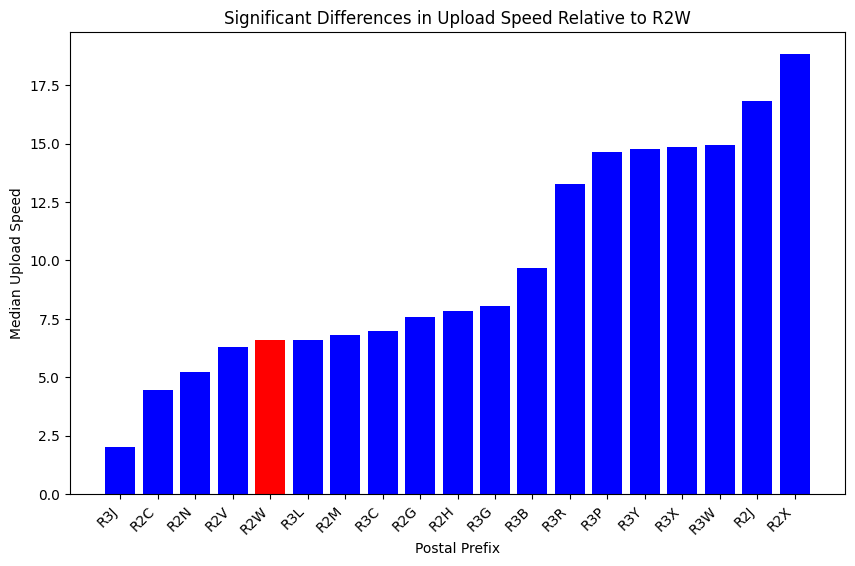

In [412]:
import matplotlib.pyplot as plt

# Select the desired postal prefixes for the bar chart
selected_prefixes = ['R2W', 'R2V', 'R2N', 'R3J', 'R2C', 'R3L', 'R2M', 'R3W', 'R2G', 'R3R', 'R2H', 'R3B', 'R3C', 'R3P', 'R3Y', 'R3G', 'R2J', 'R2X', 'R3X']

# Filter the DataFrame for the selected postal prefixes
df_selected = df[df['POSTAL PREFIX'].isin(selected_prefixes)]

# Sort the DataFrame by median upload speed in ascending order
df_selected_sorted = df_selected.sort_values('MEDIAN UPLOAD')

# Set the colors for the bars
colors = ['red' if prefix == 'R2W' else 'blue' for prefix in df_selected_sorted['POSTAL PREFIX']]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_selected_sorted['POSTAL PREFIX'], df_selected_sorted['MEDIAN UPLOAD'], color=colors)
plt.xlabel('Postal Prefix')
plt.ylabel('Median Upload Speed')
plt.title('Significant Differences in Upload Speed Relative to R2W')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()
